In [1]:
from gan import *
from dataset import *
import numpy as np
from matplotlib import pyplot as plt
conf = {
    'gen_conf':{
        'name':'dcgan_g',
        'z_dim':100,
        'hidden_size':128,
        'channel':1
    },
    
    'dis_conf':{
        'name':'dcgan_d',
        'hidden_size':128,
        'channel':1
    },
    'sampler':'gaussian'
}

In [2]:
# FS_label = np.zeros(10)
FS_label = np.ones(10)*6000
# FS_label[8] = 50
# FS_label[1] = 50
MNIST_label = np.zeros(10)
MNIST_label[1] = 100
dataset = FasionMNIST_MNIST(32, FS_label, MNIST_label)

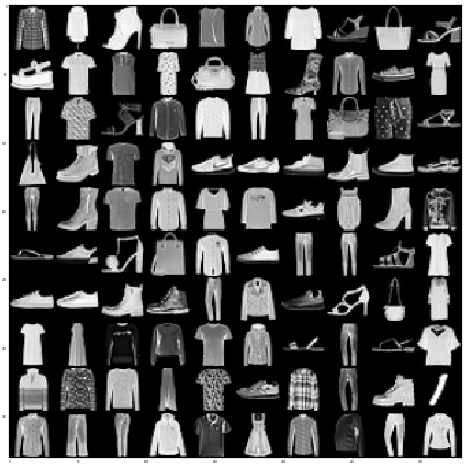

In [6]:
import importlib
import vis
vis = importlib.reload(vis)
_ = vis.show_image_dataset(dataset, n_row=10, n_col=10)

In [7]:
dev = torch.device('cuda:0')
gan = GAN(gen_conf=conf['gen_conf'], 
          dis_conf=conf['dis_conf'], 
          sampler_type=conf['sampler'], 
          dataset=dataset, 
          batch_size=128, device=dev)

In [8]:
gan.train_mode()
gan.train(iters=4000)

100%|██████████| 4000/4000 [10:04<00:00,  6.56it/s]


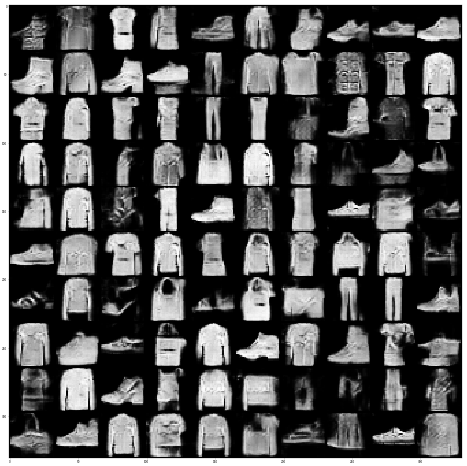

In [10]:
_ = vis.show_image_gan(gan, 10, 10)

In [11]:
import os
base_dir = 'data/fashion_single_gan100/'
for i in range(50):
    print('save:', i)
    path = base_dir+'gan{0:02d}'.format(i)

    if not os.path.exists(path):
        os.makedirs(path)
    for j in range(50):
        savename = path+'/batch{0:03d}.pt'.format(j)
        a = gan.gen_samples(600)
        torch.save(a, savename)


save: 0
save: 1
save: 2
save: 3
save: 4
save: 5
save: 6
save: 7
save: 8
save: 9
save: 10
save: 11
save: 12
save: 13
save: 14
save: 15
save: 16
save: 17
save: 18
save: 19
save: 20
save: 21
save: 22
save: 23
save: 24
save: 25
save: 26
save: 27
save: 28
save: 29
save: 30
save: 31
save: 32
save: 33
save: 34
save: 35
save: 36
save: 37
save: 38
save: 39
save: 40
save: 41
save: 42
save: 43
save: 44
save: 45
save: 46
save: 47
save: 48
save: 49
